<a href="https://colab.research.google.com/github/masahirotoba/Python/blob/main/250908_%E6%A9%8B%E6%A2%81%E3%81%AE%E5%B9%B4%E4%BB%A3%E3%83%BB%E7%94%A8%E9%80%94%E3%81%8B%E3%82%89%E6%9D%90%E6%96%99%E3%81%AE%E4%BA%88%E6%B8%AC%E3%83%A2%E3%83%87%E3%83%AB%E3%82%92%E6%A7%8B%E7%AF%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandasをインポート

In [36]:
import pandas as pd

# ピッツバーグブリッジのデータセットをインポート

In [37]:
pip install ucimlrepo

In [38]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
pittsburgh_bridges = fetch_ucirepo(id=18)

# data (as pandas dataframes)
X = pittsburgh_bridges.data.features
y = pittsburgh_bridges.data.targets

# metadata
print(pittsburgh_bridges.metadata)

# variable information
print(pittsburgh_bridges.variables)

{'uci_id': 18, 'name': 'Pittsburgh Bridges', 'repository_url': 'https://archive.ics.uci.edu/dataset/18/pittsburgh+bridges', 'data_url': 'https://archive.ics.uci.edu/static/public/18/data.csv', 'abstract': 'Bridges database that has original and numeric-discretized datasets', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 108, 'num_features': 12, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': None, 'index_col': ['IDENTIF'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Thu Mar 21 2024', 'dataset_doi': '10.24432/C5RP5H', 'creators': ['Yoram Reich', 'Steven Fenves'], 'intro_paper': None, 'additional_info': {'summary': "There are two versions to the database: \r\n    -  V1 contains the original examples and \r\n     - V2 contains descriptions after discretizing numeric properties.\r\n\r\nThere are no ``classes'' in the domain. Rather this is

# X（特徴量）の中身を確認

In [39]:
X.head()

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
0,M,3.0,CRAFTS,HIGHWAY,NaN,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
1,A,25.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
2,A,39.0,CRAFTS,AQUEDUCT,NaN,1.0,N,THROUGH,WOOD,NaN,S,WOOD
3,A,29.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
4,M,23.0,CRAFTS,HIGHWAY,NaN,2.0,N,THROUGH,WOOD,NaN,S,WOOD


# 基本統計量を確認

In [40]:
X.describe()

,LOCATION,LANES
count,107.000000,92.000000
mean,25.978505,2.630435
std,13.665871,1.164657
min,1.000000,1.000000
25%,15.500000,2.000000
50%,27.000000,2.000000
75%,37.500000,4.000000
max,52.000000,6.000000


# 機械学習ライブラリをインポート

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 年代、用途、材料の3列のみを選択

In [42]:
# データ統合
df = pd.concat([X, y], axis=1)

# 必要な列だけ選択
columns = ['ERECTED', 'PURPOSE', 'MATERIAL']
data = df[columns].dropna()  # 欠損値削除

print(f"元データ: {len(df)}件")
print(f"使用データ: {len(data)}件")

元データ: 108件
使用データ: 106件


# カテゴリを数値に変換

In [43]:
le_purpose = LabelEncoder()
le_material = LabelEncoder()
le_erected = LabelEncoder()

data_encoded = data.copy()
data_encoded['PURPOSE'] = le_purpose.fit_transform(data['PURPOSE'])
data_encoded['MATERIAL'] = le_material.fit_transform(data['MATERIAL'])
data_encoded['ERECTED'] = le_erected.fit_transform(data['ERECTED'])  # ERECTEDも変換

# 入力と出力
X_simple = data_encoded[['ERECTED', 'PURPOSE']]  # 年代と用途
y_simple = data_encoded['MATERIAL']               # 材料

# 学習・テストに分割（7割を学習させて、3割をテスト用に残しておく）
X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y_simple, test_size=0.3
)

# モデル学習

In [44]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 精度
accuracy = accuracy_score(y_test, y_pred)
print(f"予測精度: {accuracy:.2%}")

予測精度: 78.12%


# 簡単な予測例

In [45]:
print("\n予測例:")
example_input = [[1, 1]]  # エンコード後の値で入力
prediction = model.predict(example_input)[0]
material_name = le_material.inverse_transform([prediction])[0]
erected_example = le_erected.inverse_transform([1])[0]
purpose_example = le_purpose.inverse_transform([1])[0]
print(f"{erected_example}年、{purpose_example}用途 → 推奨材料: {material_name}")


予測例:
EMERGING年、HIGHWAY用途 → 推奨材料: STEEL


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# 可視化ライブラリをインポート


In [46]:
import matplotlib.pyplot as plt

# 材料別の建築数

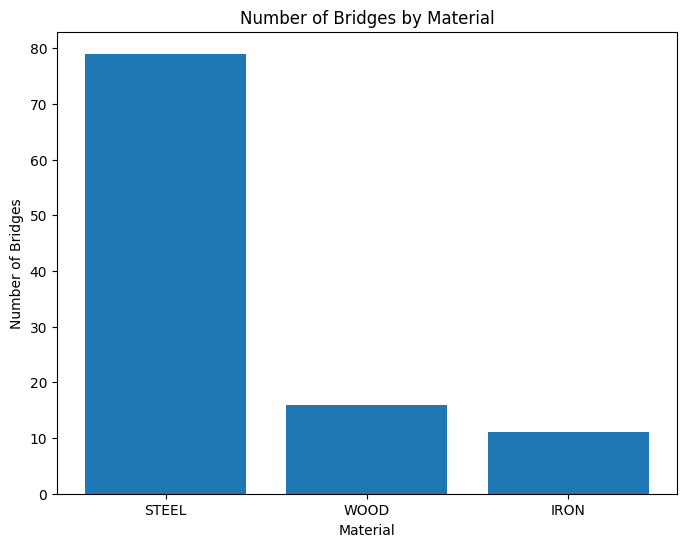

In [48]:
# 材料別の件数をカウント
material_counts = data['MATERIAL'].value_counts()

# 縦棒グラフ作成
plt.figure(figsize=(8, 6))
plt.bar(material_counts.index, material_counts.values)
plt.xlabel('Material')
plt.ylabel('Number of Bridges')
plt.title('Number of Bridges by Material')
plt.show()

# 時代区分（CRAFTS, EMERGING, MATURE, MODERN）ごとに材料の件数を比較

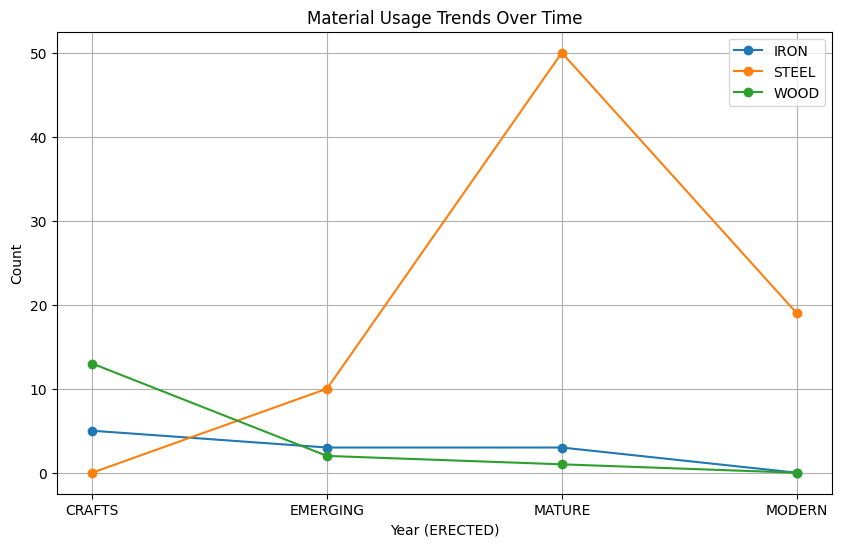

In [50]:
# 年代と材料を含むデータを再取得
df2 = pd.concat([X, y], axis=1)
columns = ['ERECTED', 'MATERIAL']
data_time = df2[columns].dropna()

# 年代と材料の組み合わせをカウント
time_material = data_time.groupby(['ERECTED', 'MATERIAL']).size().reset_index(name='count')

# ピボットテーブルで整形
pivot_data = time_material.pivot(index='ERECTED', columns='MATERIAL', values='count').fillna(0)

# 折れ線グラフ作成
plt.figure(figsize=(10, 6))
for material in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[material], marker='o', label=material)

plt.xlabel('Year (ERECTED)')
plt.ylabel('Count')
plt.title('Material Usage Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()